In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import json
import os
import datetime
import nrrd
import bg_space as bg
from pprint import pprint
from matplotlib.colors import LogNorm, Normalize
import seaborn as sb
import pathlib
import pathlib
from bg_atlasapi import BrainGlobeAtlas
from lcm_registration import LCM_registration_functions as lrf
# from LCM_registration_functions import get_z_value
# from LCM_registration_functions import get_roi_vol
from lcm_registration import visualign_functions as vis
from znamutils import slurm_it


In [3]:
bg_atlas = BrainGlobeAtlas("allen_mouse_25um", check_latest=False)

In [34]:
sections_with_nothing_before = []
slicebefore_name = 's023'
sections_with_nothing_before.append(slicebefore_name)

In [35]:
sections_with_nothing_before

['s023']

In [4]:
lcm_directory = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_V1_MAPseq/BRAC8198.6c/LCM_registration') 
json_vis = lcm_directory/'reference/191123_visualign.json'#where registration file is saved
#savingpath = ('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/LCM_registration/allenccf/allen_ccf_coord') #where you want to save
#below is path where allen annotation nrrd file is
allen_anno_path = '/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/LCM_registration/reference/annotation_25.nrrd'

In [6]:
lrf.convert_images(lcm_aligned_dir= json_vis,use_slurm=True, slurm_folder='/camp/home/turnerb/slurm_logs')

'61590833'

In [43]:
OB_first = 'no' #direction of slicing. If first few sections are OB, type 'yes'
#sections where there is a missing section before -> includes first slice
add_z = get_z_value(lcm_dir=lcm_directory, OB_first = OB_first)


/tmp/ipykernel_10782/715363724.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  add_z= add_z.append({'slice': slice_name, 'amountz': dif},ignore_index=True)
/tmp/ipykernel_10782/715363724.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  add_z= add_z.append({'slice': slice_name, 'amountz': dif},ignore_index=True)
/tmp/ipykernel_10782/715363724.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  add_z= add_z.append({'slice': slice_name, 'amountz': dif},ignore_index=True)
/tmp/ipykernel_10782/715363724.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  add_z= add_z.append({'slice': slice_name, 'amountz': dif},ignore_index=True)


In [12]:
ROI_vol = lrf.get_roi_vol(lcm_dir=lcm_directory, add_z=add_z, allen_anno_path=allen_anno_path, z_moving_towards_OB='no')

/nemo/lab/znamenskiyp/home/users/turnerb/code/MAPseq_processing/lcm_registration/LCM_registration_functions.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allen_anno = np.array(allen_anno)
/nemo/lab/znamenskiyp/home/users/turnerb/code/MAPseq_processing/lcm_registration/LCM_registration_functions.py:222: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROI_vol= ROI_vol.append({'slice': slice_name, 'tube': tube, 'z_added': z_to_add, 'vol (um3)': vol_roi, 'region_pix': ROI_anno, 'unique_regions': unique[1:], 'region_vol (um3)': region_vol[1:]},ignore_index=True)
/nemo/lab/znamenskiyp/home/users/turnerb/code/MAPseq_processing/lcm_registration/LCM_registration_functions.py:222: Fut

In [9]:
ROI_vol =pd.read_pickle(lcm_directory/'ROI_vol.pkl', )

In [51]:
lrf.combine_tubes(lcm_dir=str(lcm_directory), ROI_vol_path=str(lcm_directory/'ROI_vol.pkl'), use_slurm=True, slurm_folder='/camp/home/turnerb/slurm_logs')

'61797075'

In [26]:
bg_atlas.structures[0.023529413156211376]['acronym']

KeyError: 0

In [67]:
add_z

,slice,amountz
0,s026,558.048456
1,s060,185.907990
2,s039,452.654341
3,s059,232.474140
4,s051,384.277015
5,s042,308.235892
6,s049,260.252071
7,s044,416.983918
8,s041,246.157260
9,s050,422.910591


In [25]:
for i, r in ROI_vol.iterrows():
    unique = r.unique_regions
    for x in unique:
        if x < 1:
            if x > 0:
                print(x, i, r['tube'])
        

0.023529413156211376 154 123
0.04705882631242275 154 123
0.0705882366746664 154 123
0.0941176526248455 154 123
0.1411764733493328 154 123
0.16470588371157646 154 123
0.23529412597417831 154 123
0.25882353633642197 154 123
0.30588235706090927 154 123
0.3294117674231529 154 123
0.3529411777853966 154 123
0.40000002086162567 154 123
0.447058841586113 154 123
0.47058825194835663 154 123
0.6078431732021272 154 123
0.6588235348463058 154 123
0.6980392569676042 154 123
0.8549020113423467 154 123


In [48]:
lcm_dir = lcm_directory
roi_path = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_V1_MAPseq/BRAC8198.6c/LCM_registration/rois/')
image_reverse_of_cutting_side = 'yes'
z_to_add = add_z
region = 'S042_TUBE123.png'
slice_name = f's{region[1:4]}'
tube = region[5:len(region)].split('TUBE', 1)[1]
tube =tube[:-4]
[xa, ya, za, one] = np.load(lcm_dir/f'allenccf/allen_ccf_coord/allen_ccf_converted_{slice_name}.npy')
roi = plt.imread(roi_path / f'{region}')
allencoord_roiya = roi*ya
allencoord_roiza = roi*za
#use shoelace formula to define area of polygon given xy coordinates then calculate volume of each LCM roi
calcz = allencoord_roiza[allencoord_roiza!= 0]
calcy = allencoord_roiya[allencoord_roiya!= 0]
area_roi = 0.5*np.abs(np.dot(calcz,np.roll(calcy,1))-np.dot(calcy,np.roll(calcz,1)))
z_to_add = add_z.loc[add_z['slice'] == slice_name, 'amountz'].iloc[0]
if image_reverse_of_cutting_side == 'yes':
    vol_roi = area_roi*z_to_add
else:
    vol_roi = area_roi*-z_to_add
#convert the x, y, z coordinates to pixel
pixcoord = []
for i, axis in enumerate([xa, ya, za]):
    pixel = np.array(np.round(axis/25), dtype=int)
    pixel[pixel <0] = 0
    pixel[pixel >= annotation.shape[i]] = 0
    pixcoord.append(pixel)

In [49]:
registered_slice = np.zeros(xa.shape, dtype = annotation.dtype)
a2=annotation[pixcoord[0].flatten(),
            pixcoord[1].flatten(),
            pixcoord[2].flatten()].reshape(registered_slice.shape)
ROI_anno = a2*roi

In [51]:
np.unique(ROI_anno)

array([0.00000000e+00, 6.00000000e+00, 1.55000000e+02, 2.62000000e+02,
       5.49000000e+02, 7.18000000e+02, 7.33000000e+02, 9.97000000e+02,
       1.00900000e+03, 1.02000000e+03, 1.09200000e+03, 4.84682520e+08,
       4.96345668e+08])

In [4]:
lrf.combine_tubes(lcm_dir=str(lcm_directory), ROI_vol_path=str(lcm_directory/'ROI_vol.pkl'), use_slurm=True, slurm_folder='/camp/home/turnerb/slurm_logs')

'61596844'

In [8]:
#load annotation
allen_anno = nrrd.read(allen_anno_path)
allen_anno = np.array(allen_anno)
annotation = allen_anno[0]

/tmp/ipykernel_5988/4131375754.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allen_anno = np.array(allen_anno)


In [26]:
#generate list of unique id regions in all samples
for r, tube in final_pix['tube'].iteritems():
    if r ==0 :
        array = final_pix.loc[r, 'combined_pix']
    if r > 0:
        next_array = final_pix.loc[r, 'combined_pix']
        array = np.concatenate((array, next_array), axis=None)

all_regions= np.unique(array)
region_col =  all_regions[all_regions!= 0]
final_pix.tube = final_pix.tube.astype(float)
finalpix1 =final_pix.sort_values('tube').reset_index()
np.save(lcm_directory/'region_col.npy', region_col)
finalpix1.to_pickle(lcm_directory/"finalpix1.pkl")
final_pix.to_pickle(lcm_directory/"finalpix.pkl")

/tmp/ipykernel_132468/3522658521.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for r, tube in final_pix['tube'].iteritems():


In [ ]:
#load annotation
allen_anno = nrrd.read(allen_anno_path)
allen_anno = np.array(allen_anno)
annotation = allen_anno[0]

In [ ]:
roi_path = pathlib.Path(directory).parents[1]/'rois'
ROI_vol=pd.DataFrame()
for region in os.listdir(roi_path):
    if region.startswith("s0"):
        slice_name = region[0:4]
        tube = region[5:len(region)].split('TUBE', 1)[1]
        tube =tube[:-4]
        [xa, ya, za, one] = np.load(f'allenccf/allen_ccf_coord/allen_ccf_converted_{slice_name}.npy')
        roi = plt.imread('rois/%s' %region)
        allencoord_roiya = roi*ya
        allencoord_roiza = roi*za
#use shoelace formula to define area of polygon given xy coordinates then calculate volume of each LCM roi
        calcz = allencoord_roiza[allencoord_roiza!= 0]
        calcy = allencoord_roiya[allencoord_roiya!= 0]
        area_roi = 0.5*np.abs(np.dot(calcz,np.roll(calcy,1))-np.dot(calcy,np.roll(calcz,1)))
        z_to_add = add_z.loc[add_z['slice'] == slice_name, 'amountz'].iloc[0]
        vol_roi = area_roi*-z_to_add
#convert the x, y, z coordinates to pixel
        pixcoord = []
        for i, axis in enumerate([xa, ya, za]):
            pixel = np.array(np.round(axis/25), dtype=int)
            pixel[pixel <0] = 0
            pixel[pixel >= annotation.shape[i]] = 0
            pixcoord.append(pixel)

# use annotation.json to convert each pixel to region id

        registered_slice = np.zeros(xa.shape, dtype = annotation.dtype)
        a2=annotation[pixcoord[0].flatten(),
                      pixcoord[1].flatten(),
                      pixcoord[2].flatten()].reshape(registered_slice.shape)
        ROI_anno = a2*roi
#iterate image by z slices, each additional z, annotate then add to list
        slices = -round(z_to_add/25)
        for x in range(slices):
            if x >0:
                newz = pixcoord[0]-x #changed from plus to minus as going backwards
                slice = annotation[newz.flatten(), pixcoord[1].flatten(), pixcoord[2].flatten()].reshape(registered_slice.shape)
                ROI_anno_add = slice*roi
                ROI_anno = np.append(ROI_anno, ROI_anno_add)
    
        unique, counts = np.unique(ROI_anno, return_counts=True)
        region_vol = (counts/sum(counts))*vol_roi
        ROI_vol= ROI_vol.append({'slice': slice_name, 'tube': tube, 'z_added': z_to_add, 'vol (um3)': vol_roi, 'region_pix': ROI_anno, 'unique_regions': unique[1:], 'region_vol (um3)': region_vol[1:]},ignore_index=True)



In [ ]:
ROI_saving_path = pathlib.Path(directory).parents[1]/'allenccf'
ROI_vol.to_pickle(ROI_saving_path/"ROI_vol.pkl")


In [ ]:
#combine volumes for LCM
finalpix = pd.DataFrame(columns=['tube', 'combined_pix', 'vol (um3)'], dtype=int)
result = ROI_vol.groupby(['tube']).agg(', '.join).reset_index()

In [ ]:
for row, tube in result['tube'].iteritems():
    newdf = ROI_vol[ROI_vol['tube']==tube].reset_index()
    #for count, value in enumerate(newdf):
    for r, t in newdf['tube'].iteritems():
        if r ==0 :
            array = newdf.loc[r, 'region_pix']
            vol = newdf.loc[r, 'vol (um3)']
        if r > 0:
            nextarray = newdf.loc[r, 'region_pix']
            vol = vol + newdf.loc[r, 'vol (um3)']
            array = np.concatenate((array, nextarray), axis=None)
    final_pix= final_pix.append({'tube': tube, 'combined_pix': array, 'vol (um3)': vol},ignore_index=True)

In [ ]:
#generate list of unique id regions in all samples
for r, tube in final_pix['tube'].iteritems():
    if r ==0 :
        array = final_pix.loc[r, 'combined_pix']
    if r > 0:
        next_array = final_pix.loc[r, 'combined_pix']
    array = np.concatenate((array, next_array), axis=None)
all_regions= np.unique(array)
region_col =  all_regions[all_regions!= 0]
#calculate region volume in each tube, then create a heatmap of regions coloured according to region
final_pix.tube = final_pix.tube.astype(float)
finalpix1 =final_pix.sort_values('tube').reset_index()
# np.save('region_col.npy', region_col)
# finalpix1.to_pickle("finalpix1.pkl")
# final_pix.topickle("finalpix.pkl")

In [52]:
lcm_directory

PosixPath('/camp/lab/znamenskiyp/home/shared/projects/turnerb_V1_MAPseq/BRAC8198.6c/LCM_registration')

In [55]:
finalpix1= pd.read_pickle(lcm_directory/"finalpix.pkl")

In [57]:
finalpix1

,index,tube,combined_pix,vol (um3)
0,0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.727315e+07
1,50,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.407164e+07
2,61,3.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.689072e+06
3,72,4.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.998801e+05
4,83,5.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8.969032e+06
...,...,...,...,...
130,40,146.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.945984e+08
131,41,148.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.508703e+08
132,42,149.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.053106e+08
133,44,150.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.272708e+08


In [56]:
regioncol = np.load(lcm_directory/"region_col.npy")

In [58]:
#now generate empty table for the acronymns of all areas based on allen ccf
acronymncol = []
for id in regioncol:
    if bg_atlas.structures[id]['acronym'][-1].isnumeric():
        newid = bg_atlas.structures[id]["structure_id_path"][-2] #moving one level up the hierarchy if cortical layer
    elif bg_atlas.structures[id]['acronym'][-2:]== '6a' or bg_atlas.structures[id]['acronym'][-2:]== '6b':
        newid = bg_atlas.structures[id]["structure_id_path"][-2] #moving one level up the hierarchy if layer 6a/6b
    else: newid = id
    acronymn = bg_atlas.structures[newid]['acronym']
    acronymncol.append(acronymn)
acronymncol= np.unique(acronymncol).tolist()
region_table = pd.DataFrame(columns = acronymncol, dtype =int)

In [59]:
#need to generate reference table to convert id's into higher bit of hierarchy.

for row, tube in finalpix1['tube'].iteritems():
    regions = finalpix1.loc[row, 'combined_pix']
    unique, counts = np.unique(regions, return_counts=True)
    region_area = (counts/sum(counts))*(finalpix1.loc[row, 'vol (um3)'])
    regions = unique[1:]
    region_area = region_area[1:]
    values = regions, region_area
    region_table.at[row, 'sample'] = tube
    index = -1
    if regions.size != 0:
        for id in np.nditer(regions):
            index += 1
            if bg_atlas.structures[id]['acronym'][-1].isnumeric():
                newid = bg_atlas.structures[id]["structure_id_path"][-2] #moving one level up the hierarchy if cortical layer
            elif bg_atlas.structures[id]['acronym'][-2:]== '6a' or bg_atlas.structures[id]['acronym'][-2:]== '6b':
                newid = bg_atlas.structures[id]["structure_id_path"][-2] #moving one level up the hierarchy if layer 6a/6b
            else: newid = id
            acronym = bg_atlas.structures[newid]['acronym']
            region_table.at[row, acronym]= region_area[index]



/tmp/ipykernel_10782/1008254469.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row, tube in finalpix1['tube'].iteritems():


In [61]:
contra_samples= [27, 45, 46, 80, 90, 105, 118, 125]

In [65]:
region_table

,ACAd,ACAv,AD,AId,AIp,AIv,AMd,AMv,AOBgl,AOBgr,...,Contra-AUDv,Contra-VISal,Contra-VISam,Contra-VISrl,Contra-SSp-bfd,Contra-SSp-tr,Contra-SSs,Contra-VISa,Contra-SSp-ul,Contra-SSp-un
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,NaN,NaN,21310.647405,NaN,1865.388234,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944.713251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27344.607978,59570.363057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
region_tab_contra = region_table
#take areas in samples of contralateral hemisphere, and re-label as belonging to contra

for i, row in region_table.iterrows():
    if region_table['sample'].iloc[i] in contra_samples:
        for col in region_table.columns:
            if col != 'sample'and col.startswith('Contra')==False and np.isnan(region_table[col].iloc[i])== False:
                newcol = 'Contra-' + col
                if newcol not in region_tab_contra:
                    region_tab_contra[newcol]=0
                region_tab_contra[newcol].iloc[i] = region_table[col].iloc[i]
                region_tab_contra[col].iloc[i] =0
            
nozero = region_table.fillna(0)

/tmp/ipykernel_10782/325519702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_tab_contra[newcol].iloc[i] = region_table[col].iloc[i]
/tmp/ipykernel_10782/325519702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_tab_contra[newcol].iloc[i] = region_table[col].iloc[i]
/tmp/ipykernel_10782/325519702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_tab_contra[newcol].iloc[i] = region_table[col].iloc[i]
/

In [63]:
nozero

,ACAd,ACAv,AD,AId,AIp,AIv,AMd,AMv,AOBgl,AOBgr,...,Contra-AUDv,Contra-VISal,Contra-VISam,Contra-VISrl,Contra-SSp-bfd,Contra-SSp-tr,Contra-SSs,Contra-VISa,Contra-SSp-ul,Contra-SSp-un
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.0,0.0,0.0,21310.647405,0.0,1865.388234,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1944.713251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,27344.607978,59570.363057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
nozero.to_csv('3d_areas.csv',index=False)

In [ ]:
region_table

In [ ]:
id = 269
if bg_atlas.structures[id]['acronym'][-2:]== '6a' or bg_atlas.structures[id]['acronym'][-2:]== '6b':
    print('yes')

In [ ]:
bg_atlas.structures[251]['acronym'][-2:]

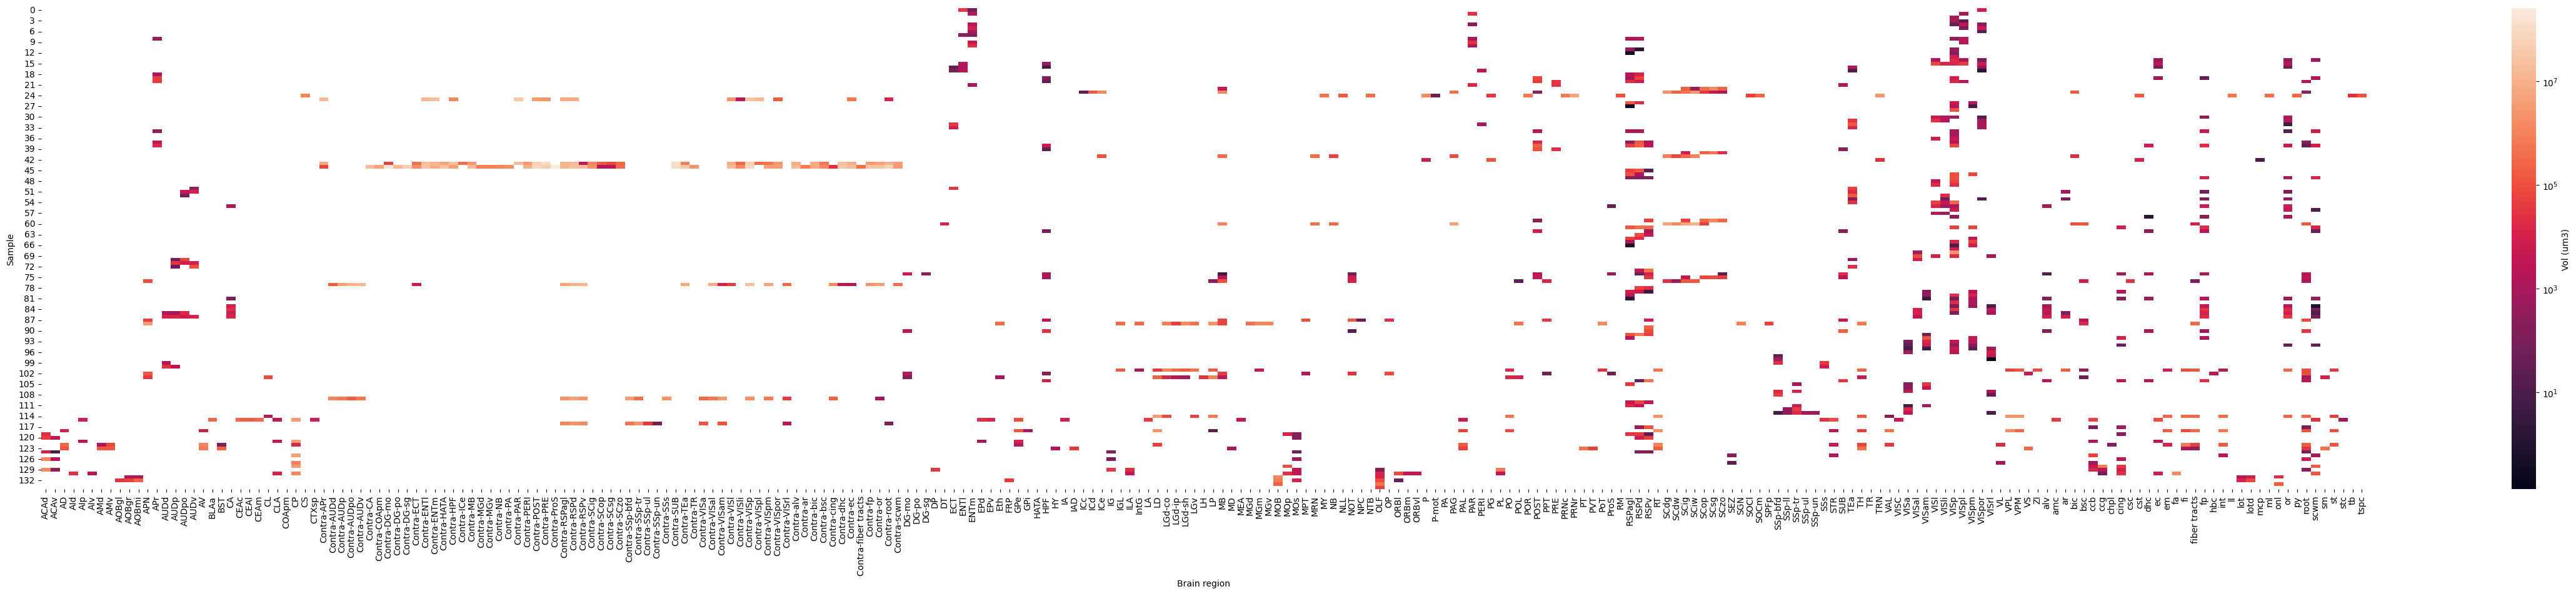

In [64]:
df= nozero.reindex(sorted(nozero.columns), axis=1)
df= df.drop(['sample'], axis=1)

fig, ax = plt.subplots(figsize=(60, 10))
sb.heatmap(df, norm=LogNorm(), cbar_kws={'label': 'Vol (um3)'})
ax.set(xlabel="Brain region",
      ylabel="Sample")

plt.savefig(f'{lcm_directory}/region_heatmap.png')
plt.show()

In [ ]:
bg_atlas.structures[bg_atlas.structures[78]["structure_id_path"][-2]]['acronym']

In [ ]:
finalpix.tube = finalpix.tube.astype(float)
finalpix1 =finalpix.sort_values('tube').reset_index()